In [25]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import _tconfint_generic
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv('water.txt', sep="\t")

In [27]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [44]:
d1 = data['mortality']
d2 = data[data['location']=='South']['mortality']
d3 = data[data['location']=='North']['mortality']
d4 = data[data['location']=='South']['hardness']
d5 = data[data['location']=='North']['hardness']
samples = [d1, d2, d3, d4, d5]

In [29]:
def confidence_intervals(d):
    data_mean_std = d.std(ddof=1)/np.sqrt(len(d))
    data_mean = d.mean()
    return _tconfint_generic(data_mean, data_mean_std, len(d) - 1, 0.05, 'two-sided')

In [30]:
confidence_intervals(d1)

(1476.0833413552848, 1572.2117406119285)

In [51]:
confidence_intervals(d2)

(1320.1517462936238, 1433.463638321761)

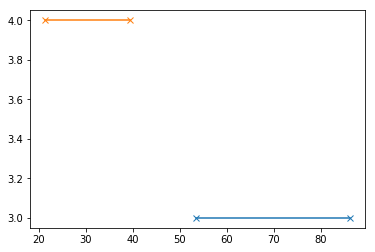

In [61]:
for i in range(3, 5):
    plt.plot([confidence_intervals(samples[i])[0], confidence_intervals(samples[i])[1]], [i, i], marker = 'x')

In [42]:
confidence_intervals(d1)[1]

1572.2117406119285

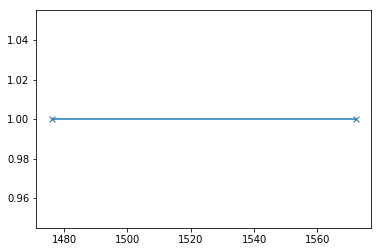

In [43]:
plt.plot([confidence_intervals(d1)[0], confidence_intervals(d1)[1]], [1, 1], marker = 'x')

In [17]:
data_mean_std = data['mortality'].std(ddof=1)/np.sqrt(len(data['mortality']))
data_mean = data['mortality'].mean()
print(_tconfint_generic(data_mean, mean_std,len(data['mortality']) - 1, 0.05, 'two-sided'))

(1476.0833413552848, 1572.2117406119285)


In [16]:
data_mean_std = data['mortality'].std(ddof=1)/np.sqrt(len(data['mortality']))
data_mean = data['mortality'].mean()
print(_tconfint_generic(data_mean, mean_std,len(data['mortality']) - 1, 0.05, 'two-sided'))

61

In [81]:
1/np.sqrt(416)

0.049029033784546011

In [82]:
(1/0.051)**2

384.4675124951942

In [83]:
416-384

32

In [84]:
from statsmodels.stats.proportion import proportion_confint

In [86]:
n=50
y=1

In [89]:
normal_interval = proportion_confint(y, n, method='normal')
wilson_interval = proportion_confint(y, n, method='wilson')

In [107]:
"%.4f" % normal_proportion[1]

'0.0588'

In [91]:
wilson_interval

(0.0035392592716462362, 0.10495443589637815)

In [92]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [116]:
samplesize_confint_proportion(proportion=0.02, half_length=0.01, alpha=0.05, method='normal')

752.92592885604893

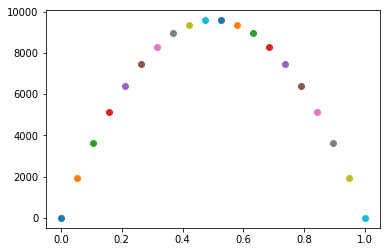

In [119]:
n_counts = []
for p in np.linspace(0, 1, 20):
    i = samplesize_confint_proportion(proportion=p, half_length=0.01, alpha=0.05, method='normal')
    n_counts.append(np.ceil(i))
    plt.plot(p, i, marker='o')

In [120]:
max(n_counts)

9578.0

In [105]:
1/50

0.02

In [110]:
0.02 - 1.96*np.sqrt(0.02*0.98/50)

-0.018806020151517725

In [121]:
(1.96*np.sqrt(0.02)/0.01)**2

768.32000000000016

38416.0


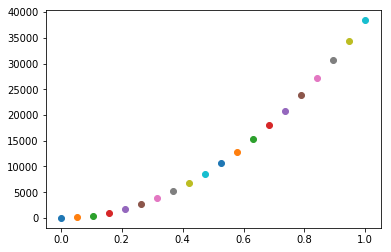

In [114]:
n_counts = []
for p in np.linspace(0, 1, 20):
    i = (1.96*p/0.01)**2
    n_counts.append(i)
    plt.plot(p, i, marker='o')
print(max(n_counts))

In [122]:
3/(2)**(1/2)

2.1213203435596424

In [123]:
from scipy.stats import norm

In [133]:
norm.ppf(1-0.003/2)

2.9677379253417944

In [ ]:
99.7

In [134]:
count_asp, asp_inf = 11037, 104
count_pl, pl_inf = 11034, 189

In [135]:
p_inf_asp = asp_inf/count_asp
p_inf_pl = pl_inf/count_pl

In [136]:
p_inf_asp

0.009422850412249705

In [139]:
p_inf_pl - p_inf_asp

0.0077060239760047815

In [140]:
import scipy

In [143]:
z = scipy.stats.norm.ppf(1 - .05 / 2.)

In [144]:
p1 = asp_inf/count_asp
p2 = pl_inf/count_pl

In [146]:
left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ count_asp + p2 * (1 - p2)/ count_pl)
right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ count_asp + p2 * (1 - p2)/ count_pl)

In [148]:
left_boundary

-0.010724297276960124

In [149]:
right_boundary

-0.0046877506750494392

0.009422850412249705

In [154]:
pa = asp_inf/(count_asp - asp_inf)

In [155]:
pp = pl_inf/(count_pl - pl_inf)

In [157]:
pp/pa

1.8320539419087138

In [158]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [161]:
asp_data = np.hstack((np.ones(asp_inf), np.zeros(count_asp - asp_inf)))
pl_data = np.hstack((np.ones(pl_inf), np.zeros(count_pl - pl_inf)))

In [168]:
pl_data

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [176]:
np.random.seed(0)

asp = map(np.median, get_bootstrap_samples(asp_data, 1000))
pl = map(np.median, get_bootstrap_samples(pl_data, 1000))

In [180]:
"%.4f" % stat_intervals(asp_data, 0.05)[0]


TypeError: only length-1 arrays can be converted to Python scalars

In [171]:
get_bootstrap_samples(asp_data, 1000)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])